# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
import warnings
warnings.filterwarnings('ignore')

# IMPORT DATASET

In [2]:
WINE=pd.read_csv('WINE.csv')
WINE

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EXPLORATORY DATA ANALYSIS

In [3]:
#shape of the dataset
WINE.shape

(178, 14)

In [4]:
#information about the dataset
WINE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
#checking for null values
WINE.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
#checking for duplicate values
WINE[WINE.duplicated]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [7]:
#gathering sstatistical information of the data
WINE.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
#gathering required columns
WINE.data=WINE.iloc[:,1:]
WINE.data.head()
#Converting the data into numerical array
wine=WINE.data.values
wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

## NORMALIZATION

In [9]:
wine_norm=scale(wine)
wine_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# METHOD 1

## APPLYING PCA FUNCTION

In [10]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(wine_norm)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

### PCA COMPONENTS

In [11]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

## VARIANCE

### AMOUNT OF VARIANCE OF EACH PCA

In [12]:
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

### CUMMULATIVE VARIANCE

In [13]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

### VARIANCE PLOT FOR PCA COMPONENTS

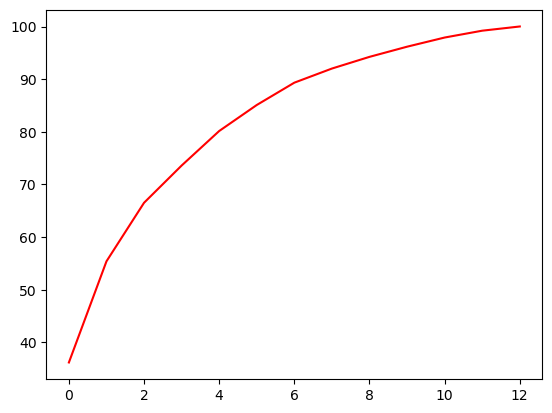

In [14]:
plt.plot(var1,color='red')

In [15]:
pca_values[:,:3] #3 principle components are chosen

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [16]:
df=pd.concat([WINE['Type'],pd.DataFrame(pca_values[:,:3],columns = ["pc1","pc2","pc3"])],axis=1)
df

,Type,pc1,pc2,pc3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688
...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570
174,3,-2.601956,-1.757229,0.207581
175,3,-2.677839,-2.760899,-0.940942
176,3,-2.387017,-2.297347,-0.550696


## VISULAZING PRINCIPLE COMPONENTS

<Axes: >

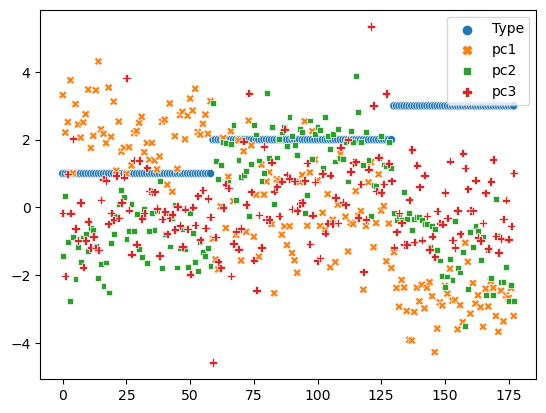

In [17]:
sns.scatterplot(data=df)

# METHOD - 2

## USING EIGEN VALUES, EIGEN VECTORS AND COVARIANCE


## Calculating Covariance

In [18]:
cov=np.cov(wine,rowvar=False)
cov

array([[ 6.59062328e-01,  8.56113090e-02,  4.71151590e-02,
        -8.41092903e-01,  3.13987812e+00,  1.46887218e-01,
         1.92033222e-01, -1.57542595e-02,  6.35175205e-02,
         1.02828254e+00, -1.33134432e-02,  4.16978226e-02,
         1.64567185e+02],
       [ 8.56113090e-02,  1.24801540e+00,  5.02770393e-02,
         1.07633171e+00, -8.70779534e-01, -2.34337723e-01,
        -4.58630366e-01,  4.07333619e-02, -1.41146982e-01,
         6.44838183e-01, -1.43325638e-01, -2.92447483e-01,
        -6.75488666e+01],
       [ 4.71151590e-02,  5.02770393e-02,  7.52646353e-02,
         4.06208278e-01,  1.12293658e+00,  2.21455913e-02,
         3.15347299e-02,  6.35847140e-03,  1.51557799e-03,
         1.64654327e-01, -4.68215451e-03,  7.61835841e-04,
         1.93197391e+01],
       [-8.41092903e-01,  1.07633171e+00,  4.06208278e-01,
         1.11526862e+01, -3.97476036e+00, -6.71149146e-01,
        -1.17208281e+00,  1.50421856e-01, -3.77176220e-01,
         1.45024186e-01, -2.09118054e

In [19]:
#Covariance matrix
covmat=pd.DataFrame(data=cov,columns=WINE.iloc[:,1:].columns)
covmat.index=WINE.iloc[:,1:].columns
covmat

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185
Malic,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867
Ash,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739
Alcalinity,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345
Magnesium,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700
Phenols,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057
Flavanoids,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492
Nonflavanoids,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586
Proanthocyanins,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334
Color,1.028283,0.644838,0.164654,0.145024,6.620521,-0.079998,-0.399169,0.040121,-0.033504,5.374449,-0.276506,-0.705813,230.767480


## Calculate Eigen Values and Eigen Vectors

In [20]:
eig_val,eig_vec=np.linalg.eig(cov)
#print(eig_val)
eig_val,eig_vec

(array([9.92017895e+04, 1.72535266e+02, 9.43811370e+00, 4.99117861e+00,
        1.22884523e+00, 8.41063869e-01, 2.78973523e-01, 1.51381266e-01,
        1.12096765e-01, 8.20370314e-03, 2.10723661e-02, 3.75759789e-02,
        7.17026032e-02]),
 array([[-1.65926472e-03, -1.20340617e-03,  1.68738094e-02,
          1.41446778e-01, -2.03369773e-02,  1.94120104e-01,
         -9.23280337e-01,  2.84820658e-01,  8.66006124e-02,
          8.02924535e-03,  1.56514071e-02, -1.49715080e-02,
         -2.24499994e-03],
        [ 6.81015556e-04, -2.15498184e-03,  1.22003373e-01,
          1.60389543e-01,  6.12883454e-01,  7.42472963e-01,
          1.50109941e-01, -6.46744678e-02,  1.56621385e-02,
         -1.10903923e-02, -6.72955455e-02, -2.31876506e-02,
         -1.85093501e-02],
        [-1.94905742e-04, -4.59369254e-03,  5.19874304e-02,
         -9.77280992e-03, -2.01755752e-02,  4.17529118e-02,
         -4.50095493e-02, -1.49339532e-01,  7.36498524e-02,
         -1.73685673e-01,  1.32063034e-01,  

## Choosing the Eigen vectors with maximum Eigen values

In [21]:
feature_vector=eig_vec[:,:2]
feature_vector

array([[-1.65926472e-03, -1.20340617e-03],
       [ 6.81015556e-04, -2.15498184e-03],
       [-1.94905742e-04, -4.59369254e-03],
       [ 4.67130058e-03, -2.64503930e-02],
       [-1.78680075e-02, -9.99344186e-01],
       [-9.89829680e-04, -8.77962152e-04],
       [-1.56728830e-03,  5.18507284e-05],
       [ 1.23086662e-04,  1.35447892e-03],
       [-6.00607792e-04, -5.00440040e-03],
       [-2.32714319e-03, -1.51003530e-02],
       [-1.71380037e-04,  7.62673115e-04],
       [-7.04931645e-04,  3.49536431e-03],
       [-9.99822937e-01,  1.77738095e-02]])

## Build Reduced New Dataset

In [22]:
data_t = np.transpose(wine)
vector_t = np.transpose(feature_vector)
newDataset_t = np.matmul(vector_t,data_t)
newDataset = np.transpose(newDataset_t)

newDataset.shape

(178, 2)

## Plot New Dataset

In [23]:
df=pd.DataFrame(newDataset,columns=['PC1','PC2'])

y=pd.Series(WINE['Type'])
y=y.replace(1,'1')
y=y.replace(2,'2')
y=y.replace(3,'3')
df['Target']=y

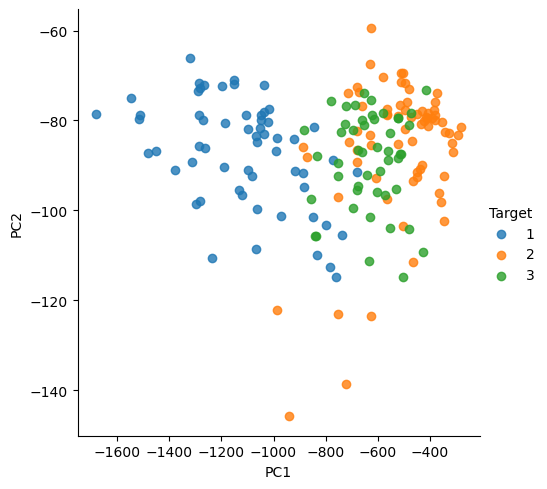

In [24]:
sns.lmplot(x='PC1',y='PC2',hue='Target',data=df,fit_reg=False,legend=True)